In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NER-datasets/part1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NER-datasets/part2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NER-datasets/part3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NER-datasets/part4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NER-datasets/part5.csv')

dataframes = [df1, df2, df3, df4, df5]
merged_df = pd.concat(dataframes)
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
import ast

# Function to clean and convert labels to integers
def clean_labels(label_str):
    try:
        # Convert string representation of list to actual list
        label_list = ast.literal_eval(label_str)
        # Ensure the labels are integers
        label_list = [int(label) for label in label_list]
        return label_list
    except (ValueError, SyntaxError):
        # Return an empty list or handle the error as needed
        return []

# Apply the cleaning function to the 'labels' column
merged_df['labels'] = merged_df['labels'].apply(clean_labels)

# Re-extract unique labels after cleaning
unique_labels_cleaned = set()
for labels in merged_df['labels']:
    unique_labels_cleaned.update(labels)

# Print unique labels after cleaning
print("Unique labels in the dataframe after cleaning:")
print(unique_labels_cleaned)

Unique labels in the dataframe after cleaning:
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [ ]:
merged_df.to_csv('merged_data.csv', index=False)

In [ ]:
LABEL2IDX = {
    'O': 0,
    'B-DAT': 1,
    'B-PER': 2,
    'B-ORG': 3,
    'B-LOC': 4,
    'B-EVE': 5,
    'I-DAT': 6,
    'I-PER': 7,
    'I-ORG': 8,
    'I-LOC': 9,
    'I-EVE': 10
}

# Reverse the dictionary to get IDX2LABEL for easy lookup
IDX2LABEL = {v: k for k, v in LABEL2IDX.items()}

In [ ]:
all_labels = []
for labels in merged_df['labels']:
    all_labels.extend(labels)

# Convert numerical labels to human-readable form
# ignoring O entity
readable_labels = [IDX2LABEL[label] for label in all_labels if label != LABEL2IDX['O']]

# Count the occurrences of each label
label_counts = Counter(readable_labels)

In [ ]:
label_counts

Counter({'B-PER': 386656,
         'I-PER': 434584,
         'B-DAT': 735262,
         'I-DAT': 905803,
         'B-LOC': 627844,
         'B-ORG': 289996,
         'I-ORG': 482480,
         'I-LOC': 393378,
         'B-EVE': 70844,
         'I-EVE': 144578})

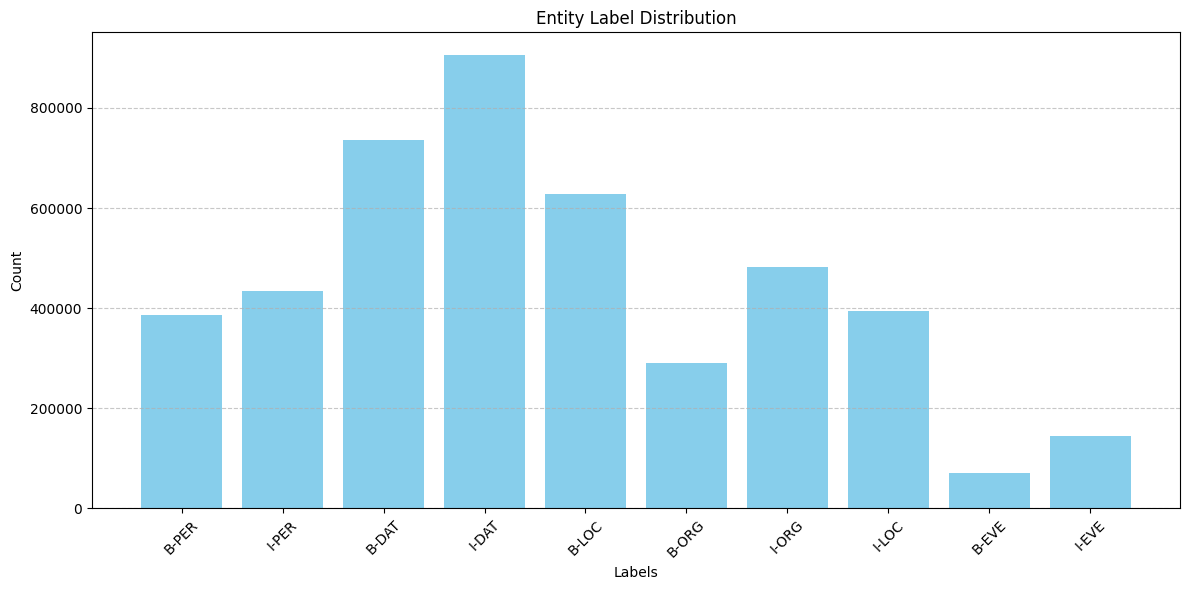

Label counts:
B-PER: 386656
I-PER: 434584
B-DAT: 735262
I-DAT: 905803
B-LOC: 627844
B-ORG: 289996
I-ORG: 482480
I-LOC: 393378
B-EVE: 70844
I-EVE: 144578


In [ ]:
# Plot the label distribution
plt.figure(figsize=(12, 6))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.title('Entity Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the label counts for further inspection
print("Label counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

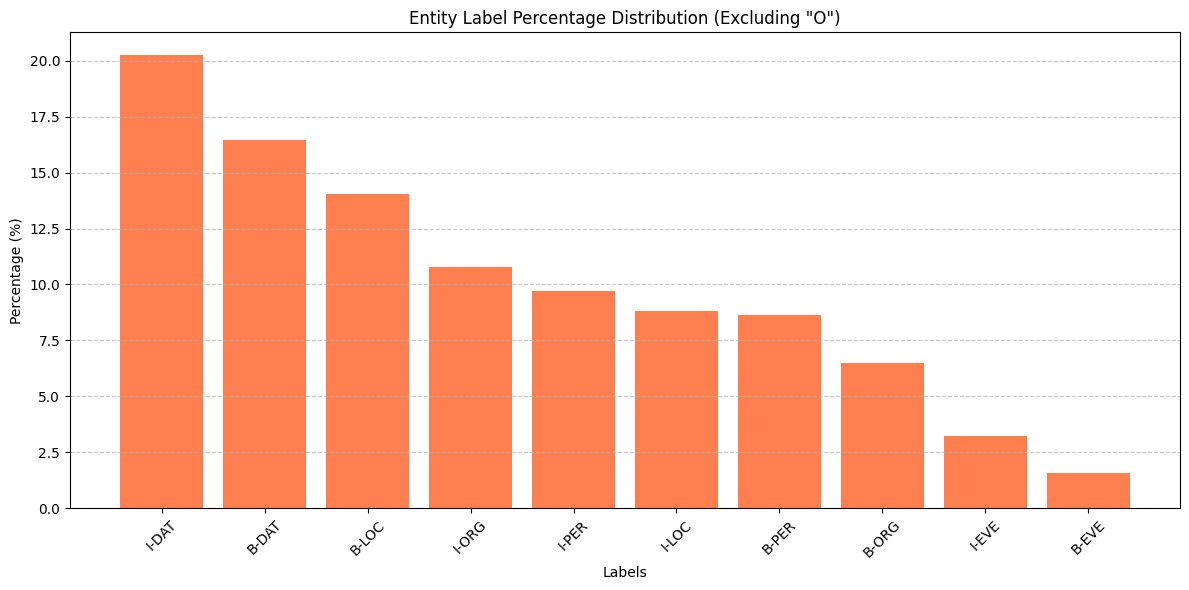

In [ ]:
total_count = sum(label_counts.values())
label_percentages = {label: (count / total_count) * 100 for label, count in label_counts.items()}
sorted_label_percentages = dict(sorted(label_percentages.items(), key=lambda item: item[1], reverse=True))
# Plot percentage distribution
plt.figure(figsize=(12, 6))
plt.bar(sorted_label_percentages.keys(), sorted_label_percentages.values(), color='coral')
plt.title('Entity Label Percentage Distribution (Excluding "O")')
plt.xlabel('Labels')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

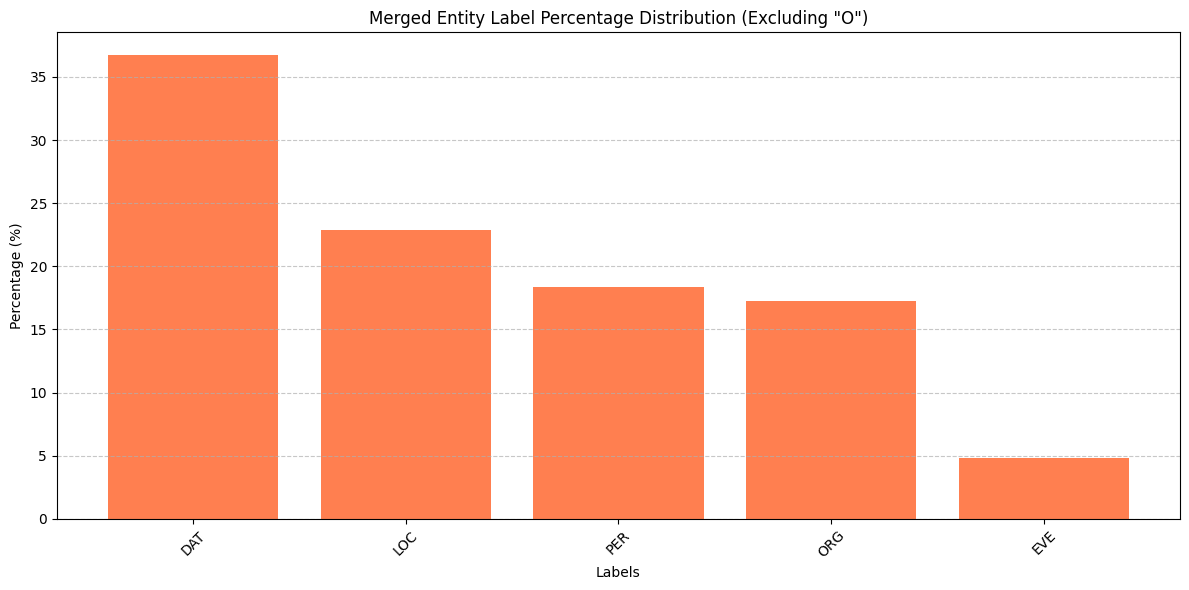

In [ ]:
# Mapping for merging B- and I- labels into a single label
merged_label_map = {
    'B-PER': 'PER', 'I-PER': 'PER',
    'B-ORG': 'ORG', 'I-ORG': 'ORG',
    'B-LOC': 'LOC', 'I-LOC': 'LOC',
    'B-DAT': 'DAT', 'I-DAT': 'DAT',
    'B-EVE': 'EVE', 'I-EVE': 'EVE'
}

# Convert numerical labels to human-readable form and merge using the above mapping
readable_labels_merged = [merged_label_map.get(IDX2LABEL[label], IDX2LABEL[label]) for label in all_labels if label != LABEL2IDX['O']]

# Count the occurrences of each merged label
label_counts_merged = Counter(readable_labels_merged)

# Calculate percentages for merged labels
total_count_merged = sum(label_counts_merged.values())
label_percentages_merged = {label: (count / total_count_merged) * 100 for label, count in label_counts_merged.items()}

# Sort label_percentages_merged by percentage in descending order
sorted_label_percentages_merged = dict(sorted(label_percentages_merged.items(), key=lambda item: item[1], reverse=True))

# Plot percentage distribution for merged labels
plt.figure(figsize=(12, 6))
plt.bar(sorted_label_percentages_merged.keys(), sorted_label_percentages_merged.values(), color='coral')
plt.title('Merged Entity Label Percentage Distribution (Excluding "O")')
plt.xlabel('Labels')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
sorted_label_percentages_merged

{'DAT': 36.70116349933187,
 'LOC': 22.83884891281862,
 'PER': 18.36640444600994,
 'ORG': 17.275834884852145,
 'EVE': 4.817748256987426}

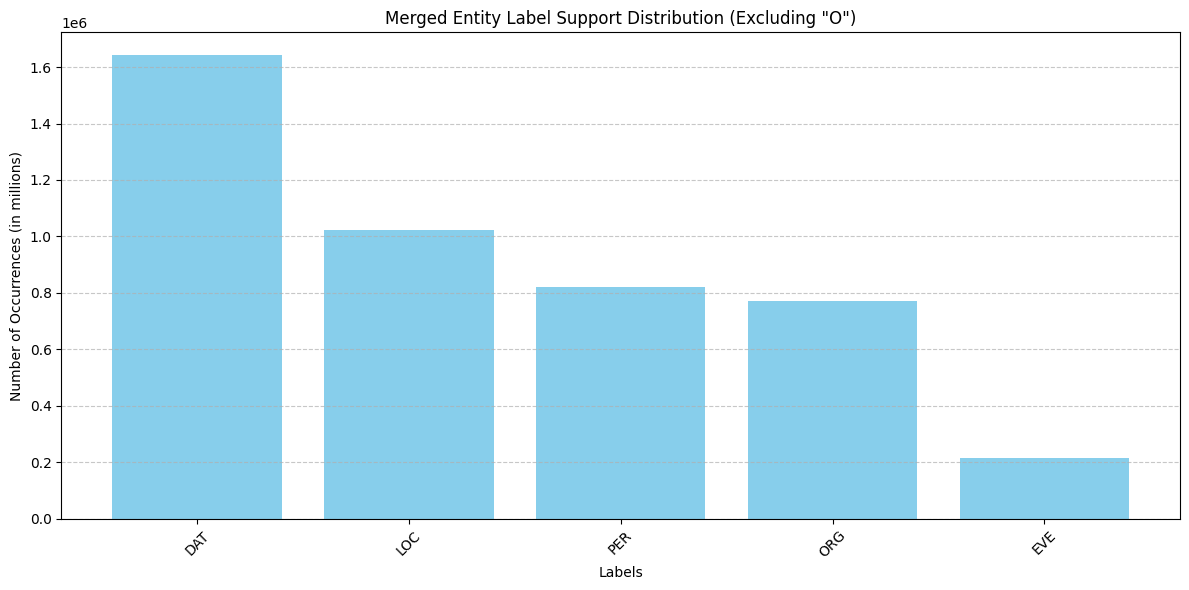

In [ ]:
# Sort label_counts_merged by count in descending order
sorted_label_counts_merged = dict(sorted(label_counts_merged.items(), key=lambda item: item[1], reverse=True))

# Plot the count distribution for merged labels
plt.figure(figsize=(12, 6))
plt.bar(sorted_label_counts_merged.keys(), sorted_label_counts_merged.values(), color='skyblue')
plt.title('Merged Entity Label Support Distribution (Excluding "O")')
plt.xlabel('Labels')
plt.ylabel('Number of Occurrences (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
